# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

From a data science perspective, the business objective of identifying key price drivers for used cars translates to a **supervised learning task**. Specifically, we will employ **regression modeling** to address this problem.  The goal is to construct a **data-driven model** capable of predicting used car prices based on a set of **input features**. These features, acting as **independent variables**, will encompass car attributes such as mileage, manufacturing year, vehicle type, and condition. The used car price itself will serve as the **dependent variable**. Through rigorous **regression analysis**, we aim to not only develop an accurate price prediction model but also to derive **actionable insights** into the relative influence of each feature on used car valuations. This will allow us to quantitatively determine the most significant factors driving price fluctuations in the used car market.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

```markdown
### Data Understanding Steps

**1. Load Data and Initial Inspection:**

Load the data into a pandas DataFrame to explore it further.  Examine the first few rows and last few rows of the CSV to get a sense of the data structure, variable types, and potential outliers. Check for nulls or missing values, potential outliers, duplicates, and whether the data "feels right"—is it a valid dataset to answer our questions? Does it include critical fields, or does it look "wrong"? For example, for our purposes, I expect data related to used cars in some relevant manner. I expect it to have sufficient data, sources, and make sense from experience. If the data does not include mileage but has weather information, the dataset is incomplete at best, useless at worst.

**2. Data Profiling and Validation:**

Generate summary statistics for each column (mean, median, standard deviation, min, max, number of unique values, number of missing values, data types). This will help identify potential outliers and data inconsistencies. Validate that the data types in each column are consistent. Note non-numeric columns that may be relevant; we will have to handle these differently.

**3. Missing Data Handling:**

Check for missing data and determine if it can be fixed via imputation or removal. See what percent of data is missing, if there's a pattern to the missing data, and if it makes sense to include it in our analysis.

**4. Outlier Handling:**

Identify outliers using box plots, scatter plots, or z-scores. Handle outliers by removal or transformation.

**5. Duplicate Handling:**

Identify and handle duplicate rows by removal or merging.

```

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/vehicles.csv")

df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [2]:
df.iloc[15:31]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
15,7223509794,bellingham,13995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
16,7222753076,bellingham,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
17,7222206015,bellingham,21850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
18,7220030122,bellingham,26850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
19,7218423006,bellingham,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
20,7216672204,bellingham,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
21,7215617048,bellingham,21850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
22,7213839225,bellingham,26850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
23,7208549803,bellingham,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
24,7213843538,skagit / island / SJI,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa


In [3]:
#lets get some stats
print(df.describe().round(2).astype(str))
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Identify columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0].index.tolist()

# Print the percentage of missing values for each column
print("Percentage of missing values for each column:\n", missing_percentage)

# how many values in cylinders are missing, and dont follow the pattern: "number text" like "8 cylinders"
# Count missing values (NaN or None)
missing_values = df['cylinders'].isna().sum()

# If empty strings are considered missing, include them
empty_strings = (df['cylinders'] == '').sum()
total_missing = missing_values + empty_strings

print(f"Missing values in 'cylinders': {total_missing}")




                  id         price      year    odometer
count       426880.0      426880.0  425675.0    422480.0
mean   7311486634.22      75199.03   2011.24    98043.33
std       4473170.41   12182282.17      9.45    213881.5
min     7207408119.0           0.0    1900.0         0.0
25%    7308143339.25        5900.0    2008.0     37704.0
50%     7312620821.0       13950.0    2013.0     85548.0
75%     7315253543.5      26485.75    2017.0    133542.5
max     7317101084.0  3736928711.0    2022.0  10000000.0
Percentage of missing values for each column:
 id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.50107

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [4]:
# drop columns that dont matter for price: VIN
df = df.drop("VIN", axis=1)

# drop id
df = df.drop('id', axis=1)

#drop size since it has ~72% absent values
df = df.drop('size', axis=1)

# drop model - from the raw data, plots and data consistency checks, we this data is randomly entered and not needed; in fact it makes it worse
df = df.drop("model", axis=1)

df.columns

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [5]:
# cylinders is an important feature for us and is a mixed set between numbers and text. Lets figure out the cylinders column
# check for nan, extract numbers, check for relationship between fuel (gas/electric/hybrid...) and cylinders
# plan:
# Extract cylinders to numbers
# For NaN cylinder values:
#   set 0 if fuel is electric
#   set to mode based on type of vehicle
#   if any still remain, set to overall mode

import re
# Define the regex pattern for "number text" (e.g., "8 cylinders")
pattern = r'^(\d+)\s+\w+$'  # Captures the number in group 1

def extract_number(value):
    # Check for NaN or empty string
    if pd.isna(value) or value == '':
        return value
    # Convert to string for regex
    value_str = str(value)
    # Try to match the pattern
    match = re.match(pattern, value_str)
    if match:
        # Return the number (as string or int, depending on preference)
        return int(match.group(1))  # Extract number as integer
    # For non-matching values, return NaN (or customize as needed)
    return np.nan

df['cylinders_extracted'] = df['cylinders'].apply(extract_number)
df = df.drop('cylinders', axis=1)
cylinder_counts = df['cylinders_extracted'].value_counts(dropna=False).reset_index()
cylinder_counts.columns = ['cylinders_extracted', 'count']
print(f"Post cyl extraction\n {cylinder_counts}")

# check for fuel
df['cylinders_extracted'] = np.where(
    (df['fuel'] == 'electric'),
    0,
    df['cylinders_extracted']
    )

# set for type
group_cols = ['type']
df['cylinders_extracted'] = df['cylinders_extracted'].fillna(
    df.groupby('type')['cylinders_extracted'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

#just mode the remaining
df['cylinders_extracted'] = df['cylinders_extracted'].fillna(df['cylinders_extracted'].mode()[0])

# check again
cylinder_counts = df['cylinders_extracted'].value_counts(dropna=False).reset_index()
cylinder_counts.columns = ['cylinders_extracted', 'count']
print(f"Post cyl extraction\n {cylinder_counts}")

# reset col name back to cylinders
df.rename(columns={'cylinders_extracted': 'cylinders'}, inplace=True)


Post cyl extraction
    cylinders_extracted   count
0                  NaN  178976
1                  6.0   94169
2                  4.0   77642
3                  8.0   72062
4                  5.0    1712
5                 10.0    1455
6                  3.0     655
7                 12.0     209
Post cyl extraction
    cylinders_extracted   count
0                  6.0  196401
1                  4.0  121572
2                  8.0  103179
3                  5.0    1712
4                  0.0    1698
5                 10.0    1455
6                  3.0     654
7                 12.0     209


In [6]:
# fix nans in numerical cols
print(df.columns)
numerical_cols = ['year','odometer','cylinders']

# year has 0.282281% missing values- lets drop them
#odometer has 1.030735% missing vlaues - lets drop them
# we dont have any nan cylinders, but for completeness, lets clean up
df = df.dropna(subset=numerical_cols)


Index(['region', 'price', 'year', 'manufacturer', 'condition', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'cylinders'],
      dtype='object')


In [7]:
print(df.info())

len(df['odometer'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 421344 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        421344 non-null  object 
 1   price         421344 non-null  int64  
 2   year          421344 non-null  float64
 3   manufacturer  405077 non-null  object 
 4   condition     250851 non-null  object 
 5   fuel          419172 non-null  object 
 6   odometer      421344 non-null  float64
 7   title_status  413986 non-null  object 
 8   transmission  419649 non-null  object 
 9   drive         292495 non-null  object 
 10  type          329562 non-null  object 
 11  paint_color   293254 non-null  object 
 12  state         421344 non-null  object 
 13  cylinders     421344 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 48.2+ MB
None


104630

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'cylinders'],
      dtype='object')

Mean and Median Price by year:
               mean     median  count
year                                 
1960.0  16480579.08    11997.5    120
1989.0   2478352.93     6400.0    571
2000.0   1705719.64     4463.5   3562
1902.0   1666666.00  1666666.0      1
1999.0   1625633.49     4995.0   3074
2021.0   1365090.25    23998.0   2348
1980.0    428606.43     7997.5    272
1965.0    359413.08    14500.0    365
2007.0    264293.57     6500.0  14693
1993.0    150012.40     5100.0    711


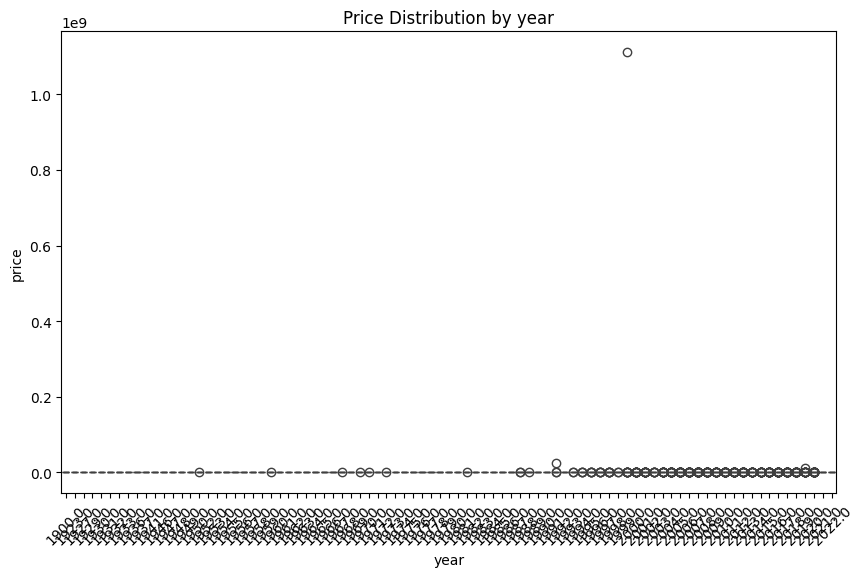


Mean and Median Price by odometer:
                  mean      median  count
odometer                                 
64181.0    61730794.50  61730794.5      2
211000.0   27087537.54      5898.5    138
9999999.0  11227718.78      2500.0     88
164000.0    9102742.37      6700.0    411
110500.0    7953192.53     10295.0     17
1000.0      6044806.38      6000.0    683
1234567.0   4578341.78      3750.0     27
320000.0    4264704.59      6000.0     29
999999.0    4237645.98     10999.0    234
103000.0    2831866.34      8995.0    500


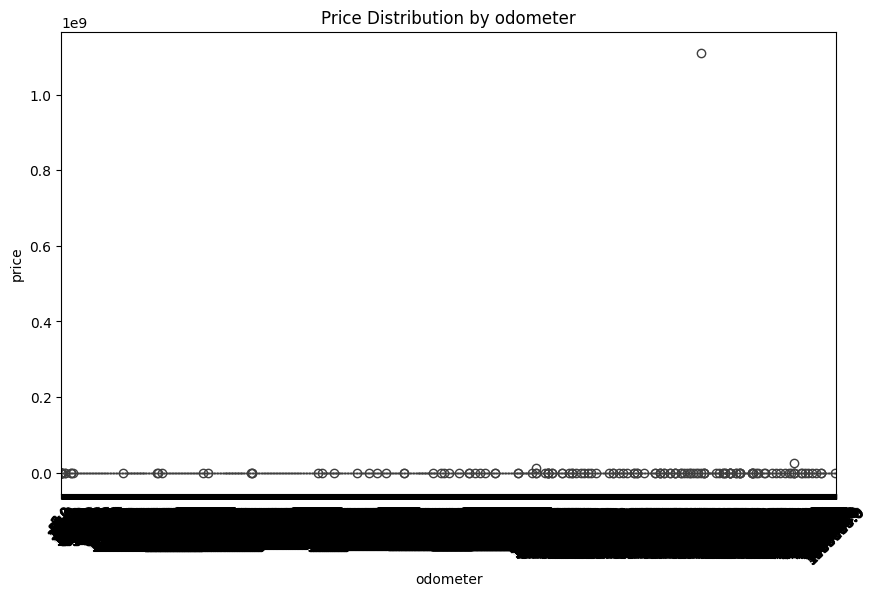


Mean and Median Price by cylinders:
                mean   median   count
cylinders                            
8.0        106858.58  21995.0  102076
6.0         99838.57  13000.0  193734
12.0        54860.99  28990.0     203
0.0         24703.07  22683.5    1690
10.0        21392.01  14995.0    1436
4.0         13852.88  10717.0  119864
3.0         12429.59   9990.0     641
5.0          7859.68   6250.0    1700


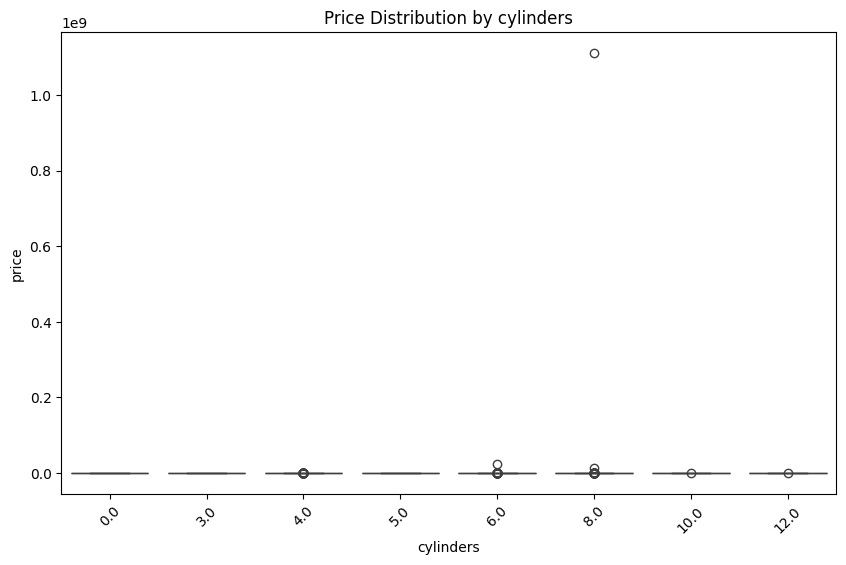

'results: \nwe see year is too many unique values and likely needs to be derived as age and use log scale\nwe see odometer is also too many values and fails to plot. We nede to bin it. \nwe see cylinders plotting well'

In [8]:
# lets check price distribution for numerical cols
print(df.columns)

import matplotlib.pyplot as plt
import seaborn as sns


for col in numerical_cols:
    print(f"\nMean and Median Price by {col}:")
    group_stats = df.groupby(col)['price'].agg(['mean', 'median', 'count']).round(2).sort_values('mean', ascending=False)

    print(group_stats.head(10))
    plt.figure(figsize=(10, 6))
    df_sampled = df.sample(n=10000, random_state=1) if len(df) > 10000 else df #Fixed the loop to sample data instead of full df. Fails with full load
    sns.boxplot(x=col, y='price', data=df_sampled)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()

"""results: 
we see year is too many unique values and likely needs to be derived as age and use log scale
we see odometer is also too many values and fails to plot. We nede to bin it. 
we see cylinders plotting well"""



In [9]:
from sklearn.preprocessing import KBinsDiscretizer

def bin_plot(df, col:str, n_bins=10):

    # Initialize discretizer: 10 bins, ordinal output, uniform bin width
    kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

    # Fit and transform odometer column (must reshape for 2D input)
    bin_col = col+"_binned"
    
    df[bin_col] = kbins.fit_transform(df[[col]]).astype(int)

    bin_edges = kbins.bin_edges_[0]
    bin_labels = [f"{int(bin_edges[i])}–{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

    # Map binned values to readable labels
    df[bin_col+"_label"] = df[bin_col].map(dict(enumerate(bin_labels)))

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=bin_col+"_label", y='price', data=df)

    plt.yscale('log')  # Logarithmic scale for price
    plt.title(f'Price Distribution by {col} (Log Scale)')
    plt.xlabel(f'{col} of Vehicle')
    plt.ylabel('Price (Log Scale)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


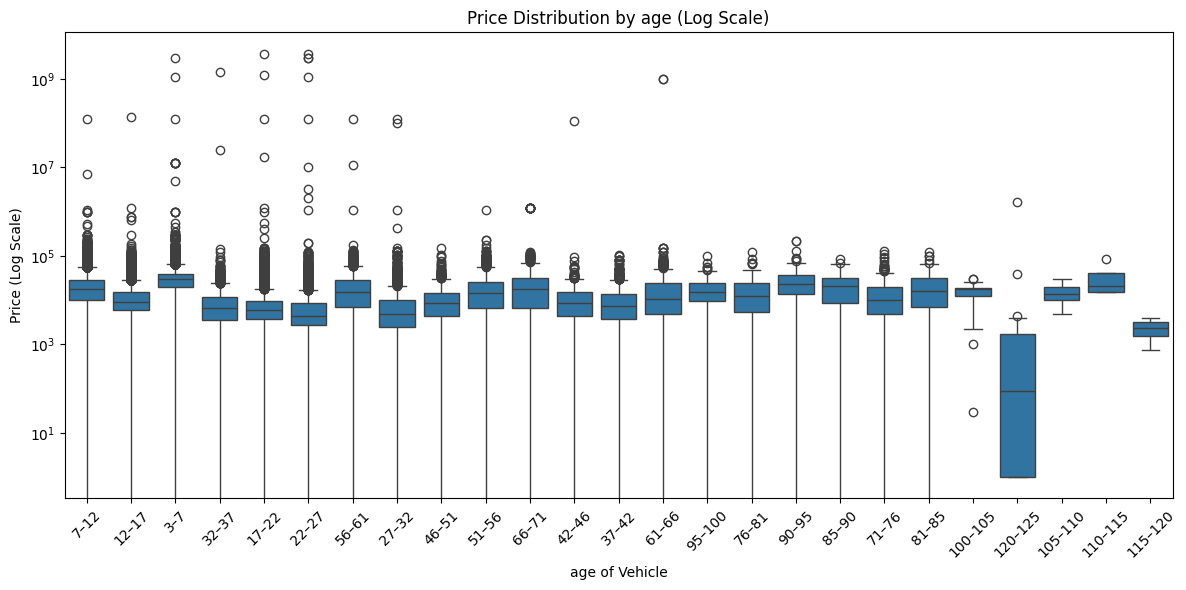

In [10]:
#derive age from year and lets check log scale
# results its still a messy graph - lets bin it and see ff we get outliers we can remove
import datetime

df['age'] = datetime.datetime.now().year - df['year']
df = df.drop('year', axis = 1)

bin_plot(df, 'age', 25)



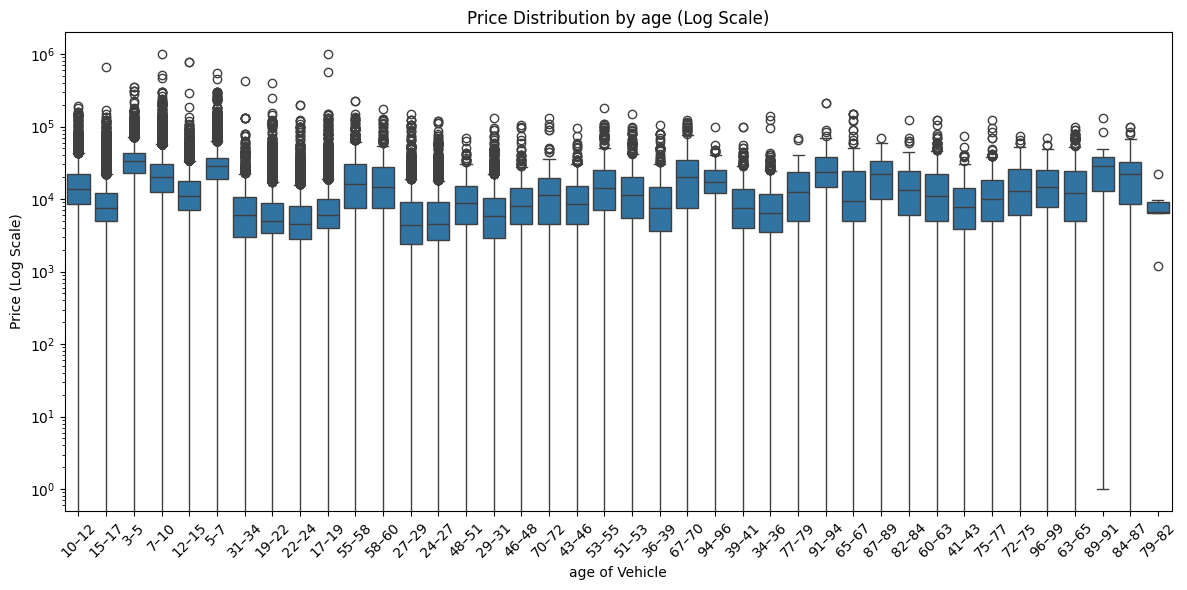

In [11]:
# results: there ae a lot of price outliers for a used car based on age. 
# lets drop card over 100 years of age
df = df[df['age'] < 100]

#lets drop prices over a million dollars and recheck
df = df[df['price'] < 1000000.0]

bin_plot(df, 'age', 40)


/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_65497/1134205344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col] = kbins.fit_transform(df[[col]]).astype(int)
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_65497/1134205344.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col+"_label"] = df[bin_col].map(dict(enumerate(bin_labels)))


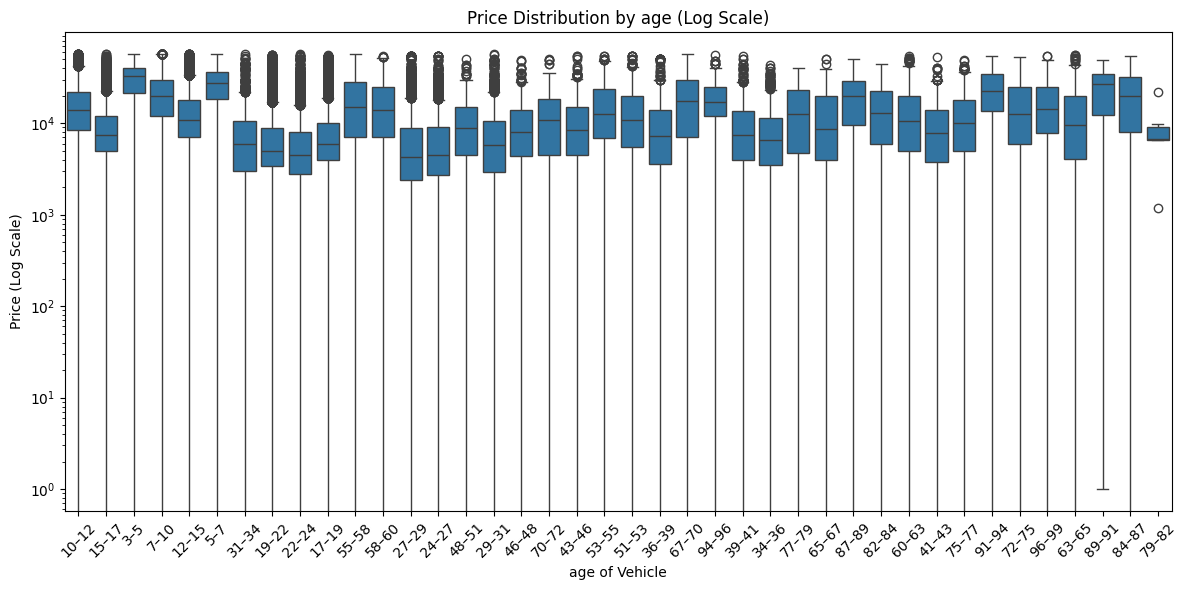

In [12]:
# we still get a lot of outliers
# lets remove price outliers in general using IQR
from scipy.stats import iqr

# Step 1: Compute IQR using scipy
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
price_iqr = iqr(df['price'], nan_policy='omit')  # This is Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * price_iqr
upper_bound = Q3 + 1.5 * price_iqr

# Step 3: Filter the DataFrame
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


bin_plot(df, 'age', 40)

/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_65497/1134205344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col] = kbins.fit_transform(df[[col]]).astype(int)
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_65497/1134205344.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col+"_label"] = df[bin_col].map(dict(enumerate(bin_labels)))


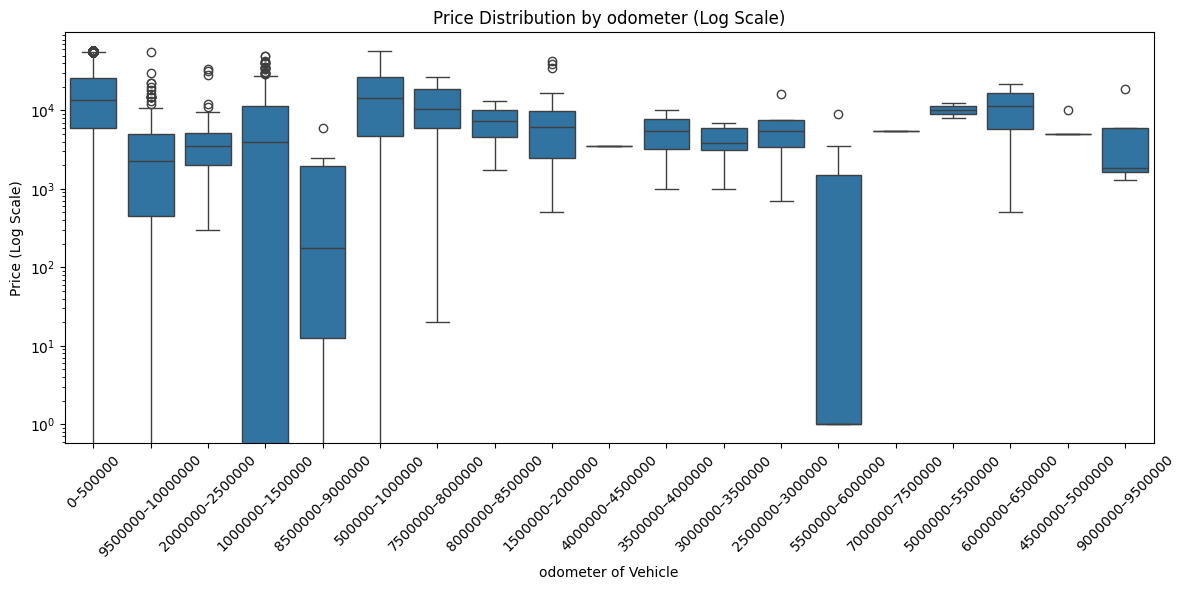

drop odometer readings eq and over 2M


/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_65497/1134205344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col] = kbins.fit_transform(df[[col]]).astype(int)
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_65497/1134205344.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col+"_label"] = df[bin_col].map(dict(enumerate(bin_labels)))


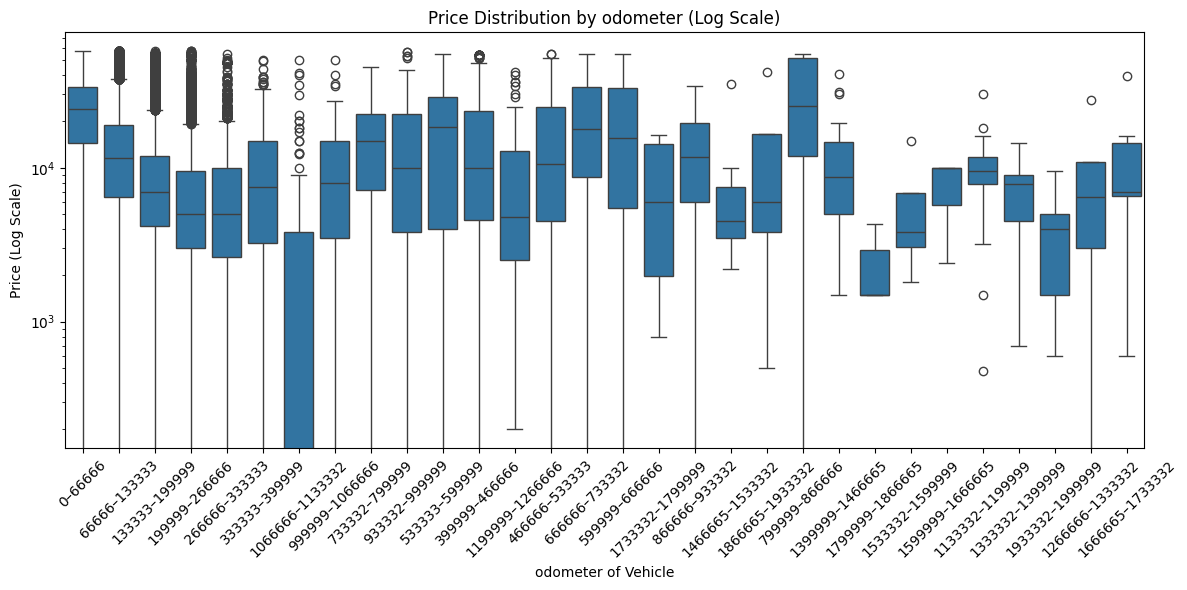

In [13]:
# bin the odometers and see how it plots

bin_plot(df, "odometer", 20)
#lets drop rows with over 20M miles
df = df[df['odometer'] < 2000000]

print("drop odometer readings eq and over 2M")
#recheck 
bin_plot(df, "odometer", 30)



Mean and Median Price by region:
                       mean   median  count
region                                     
southwest TX       30607.17  30495.0     30
galveston          28913.51  30990.0    222
owensboro          28792.19  29990.0    139
olympic peninsula  28740.19  29999.0    638
logan              28561.89  31999.0    133
san angelo         28551.53  28750.0    157
boone              28498.96  30590.0    325
northwest KS       28216.81  28900.0    142
laredo             27308.10  28995.0    322
northwest OK       27262.66  27990.0    143


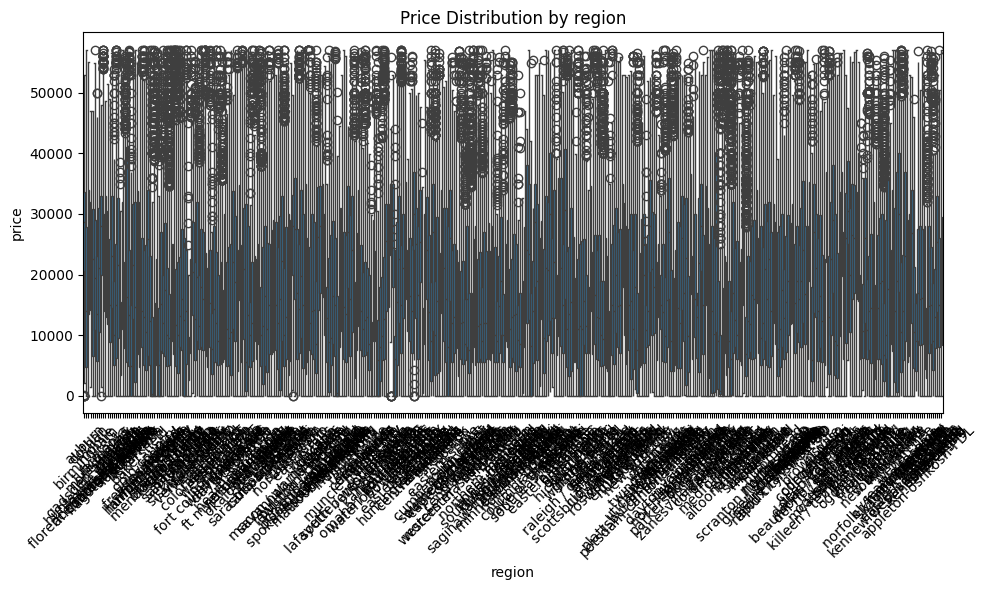


Mean and Median Price by manufacturer:
                  mean   median  count
manufacturer                          
tesla         34892.95  36999.0    777
alfa-romeo    28123.41  29590.0    891
jaguar        26200.39  28590.0   1927
ram           24871.79  25995.0  17355
porsche       24844.24  25000.0   1235
rover         23712.13  23590.0   1961
audi          22089.71  22590.0   7298
aston-martin  21870.21  17423.5     14
gmc           20721.64  19500.0  15766
acura         19768.97  18500.0   5921


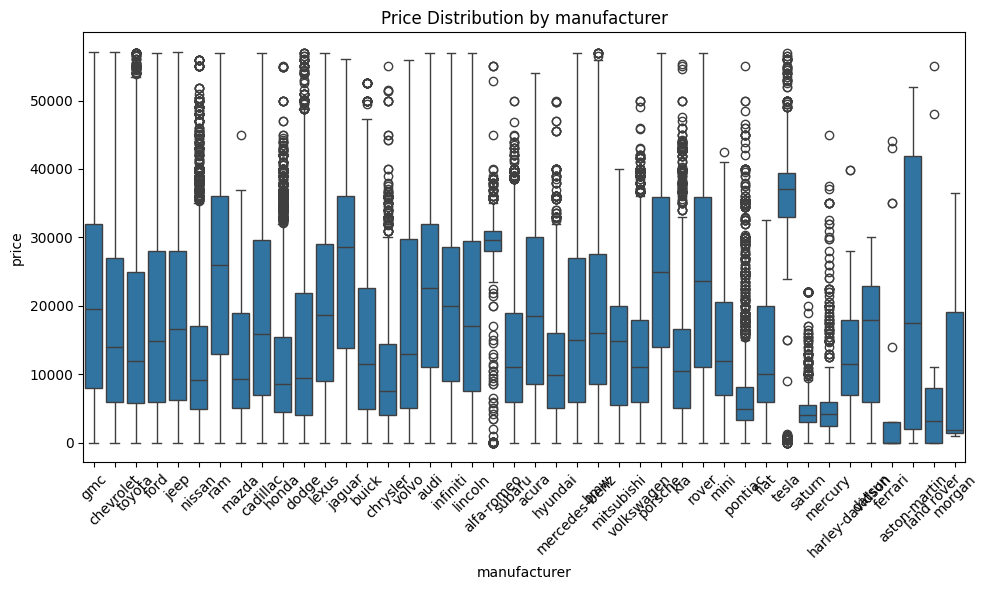


Mean and Median Price by condition:
               mean   median   count
condition                           
good       20326.43  19990.0  120448
new        16670.02  12000.0    1162
like new   16432.33  13495.0   20503
excellent  13628.58  10950.0   98377
fair        3921.91   2800.0    6709
salvage     3655.08   1850.0     591


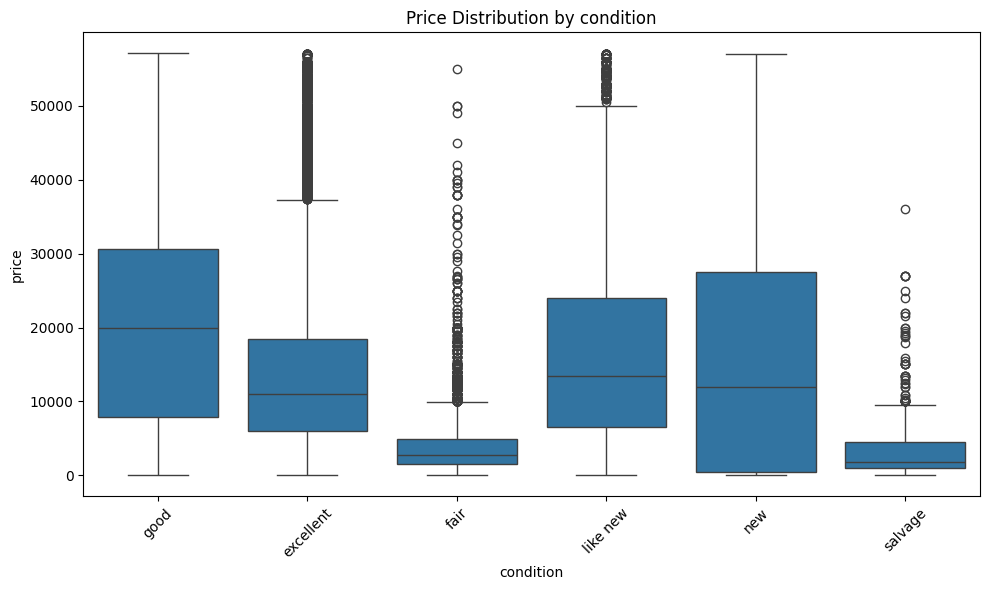


Mean and Median Price by fuel:
              mean   median   count
fuel                               
other     24090.14  25590.0   29638
diesel    24053.03  23996.0   26372
electric  22708.88  20952.0    1619
gas       15151.69  11995.0  348205
hybrid    14282.17  11995.0    5115


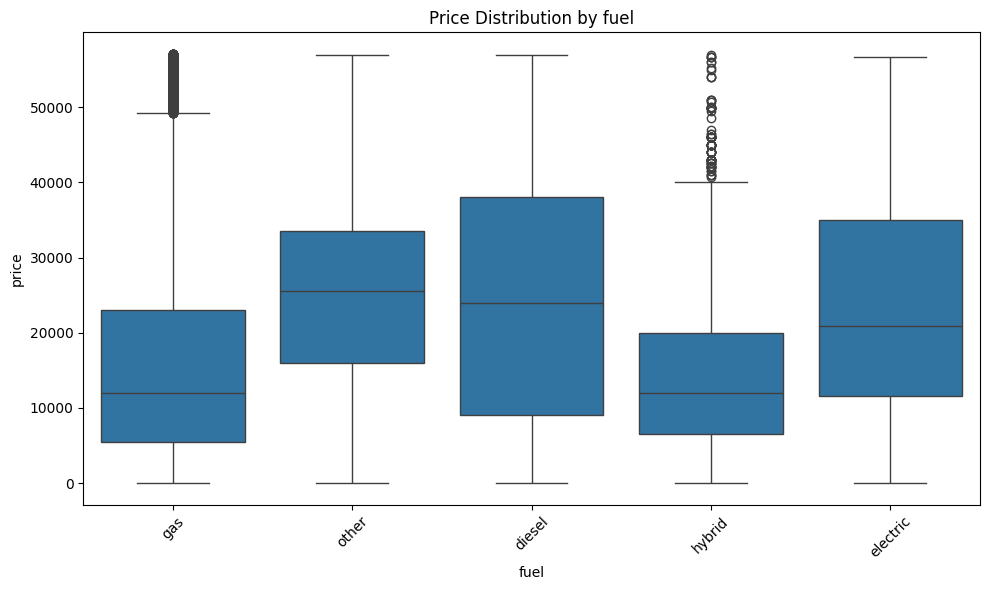


Mean and Median Price by title_status:
                  mean   median   count
title_status                           
lien          19784.17  17000.0    1357
clean         16611.80  13950.0  392675
rebuilt       12394.40   9999.0    7079
salvage        9322.70   7000.0    3836
missing        4901.09   2500.0     785
parts only     3103.30   1200.0     190


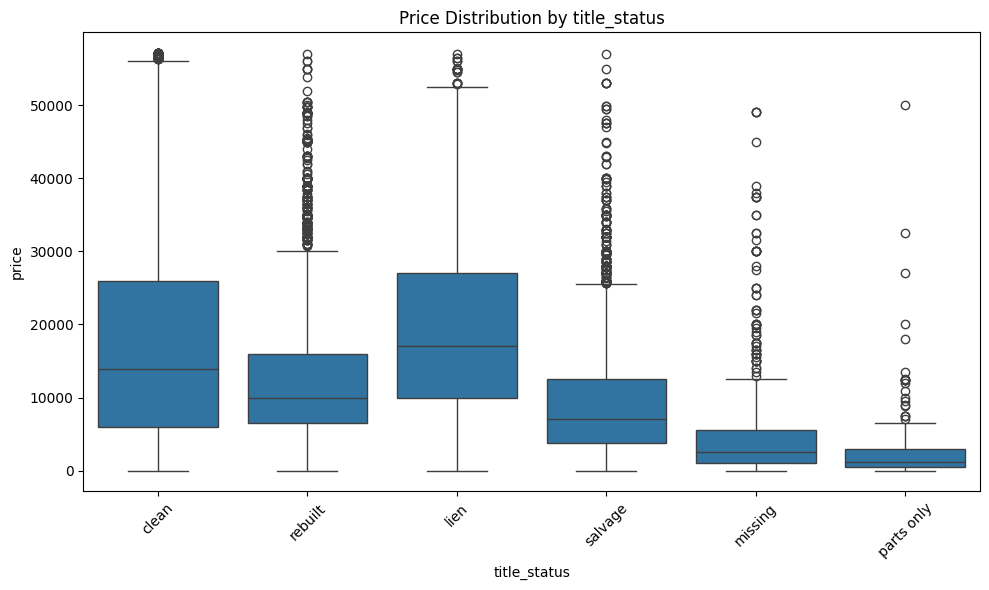


Mean and Median Price by transmission:
                  mean   median   count
transmission                           
other         27314.86  27990.0   62330
automatic     14564.63  10995.0  324800
manual        12843.74   8995.0   24329


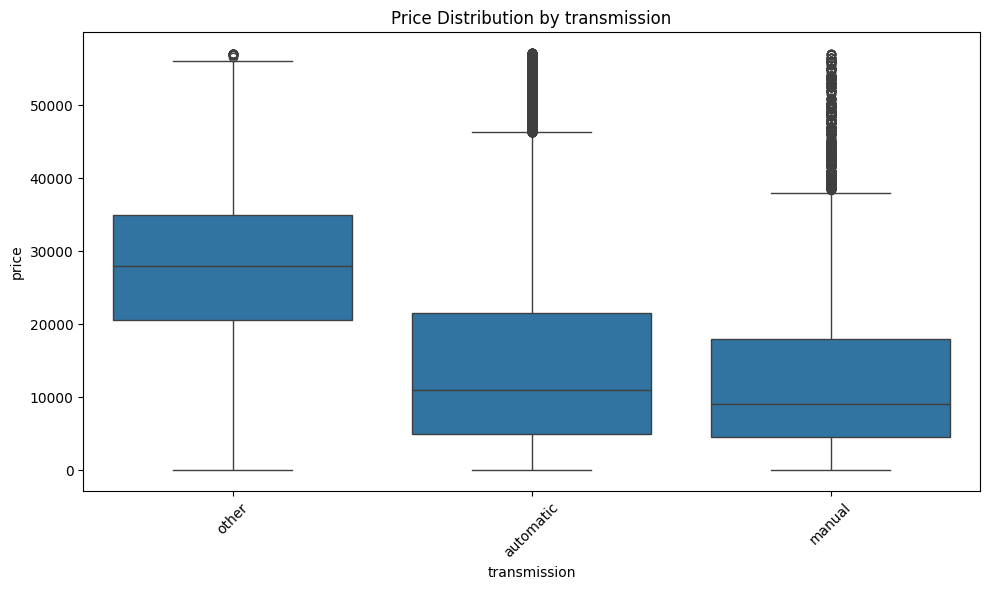


Mean and Median Price by drive:
           mean   median   count
drive                           
4wd    19583.76  17350.0  125608
rwd    18626.03  16995.0   56998
fwd    11503.38   9497.5  103672


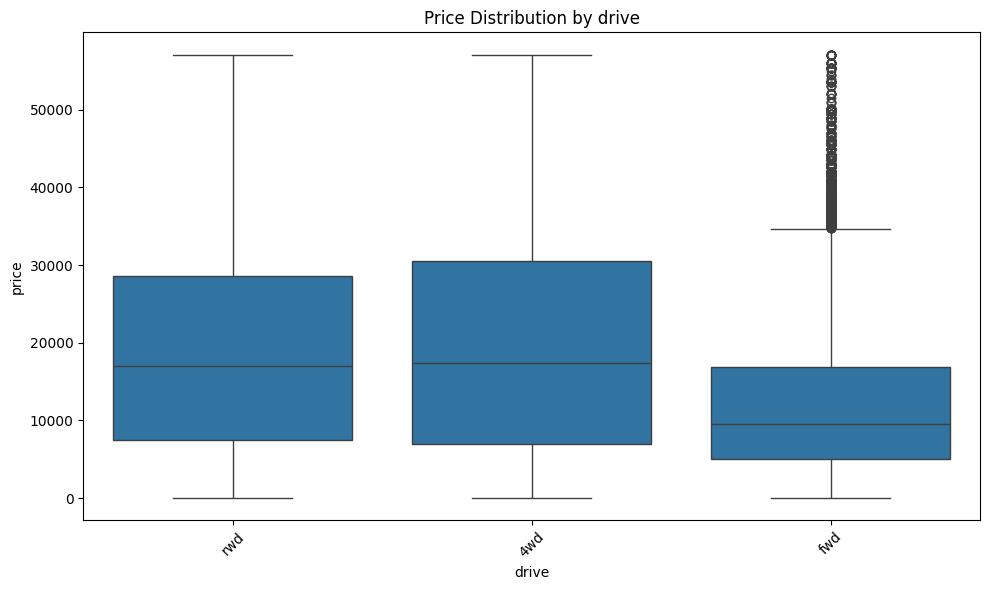


Mean and Median Price by type:
                 mean   median  count
type                                 
pickup       25625.93  26995.0  41128
other        23639.58  25545.0  21034
truck        20775.52  19850.0  33234
coupe        19672.40  17990.0  18414
convertible  17056.79  14815.5   7336
van          16303.50  14946.0   8274
SUV          15507.74  12999.0  75350
offroad      15277.55  12500.0    598
hatchback    14402.80  13990.0  16491
bus          13764.28  10900.0    515


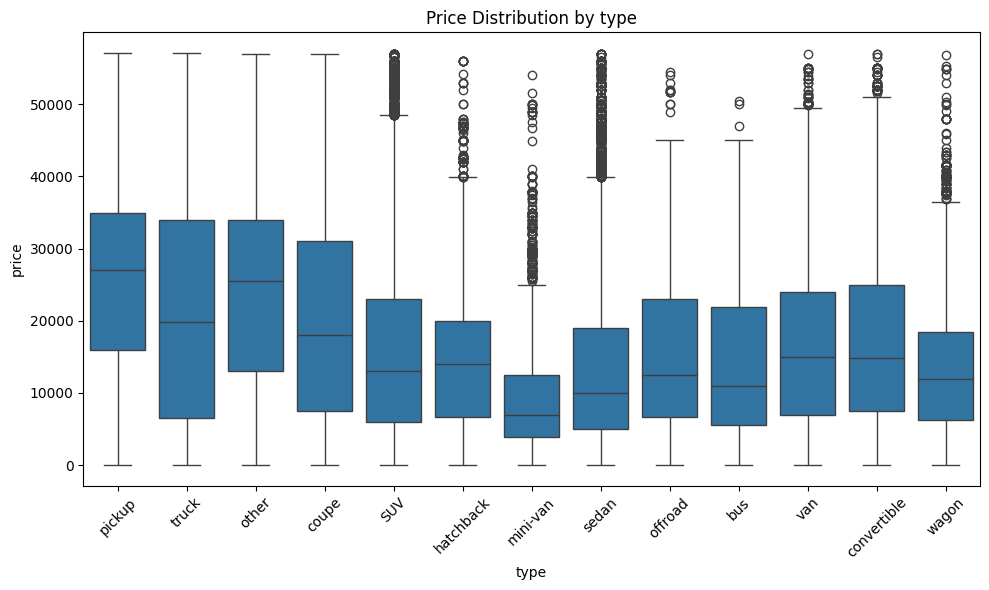


Mean and Median Price by paint_color:
                 mean   median  count
paint_color                          
white        19367.17  17990.0  76210
black        19079.25  16990.0  60446
red          17459.67  14995.0  29593
orange       17167.92  16950.0   1939
yellow       16528.41  13500.0   2067
blue         15508.42  12500.0  30532
silver       15186.65  11995.0  42091
brown        14712.45  10995.0   6498
custom       14636.02  11760.0   6599
grey         13658.62  10500.0  23728


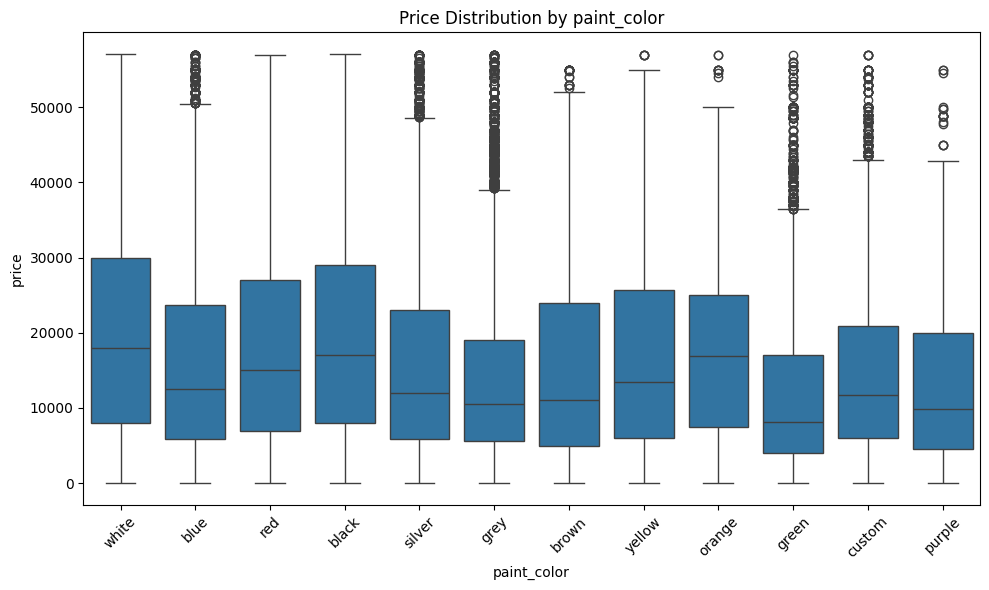


Mean and Median Price by state:
           mean   median  count
state                          
wv     23082.66  23995.0   1031
ak     22559.26  21988.0   3376
mt     21616.13  20500.0   5989
ut     20641.84  17495.0   1055
mo     19966.76  17988.0   4182
wy     19954.42  17999.0    595
al     19372.42  18640.5   4804
wa     18823.36  14999.0  12533
ky     18799.02  16900.0   4120
tn     18657.54  17000.0  10899


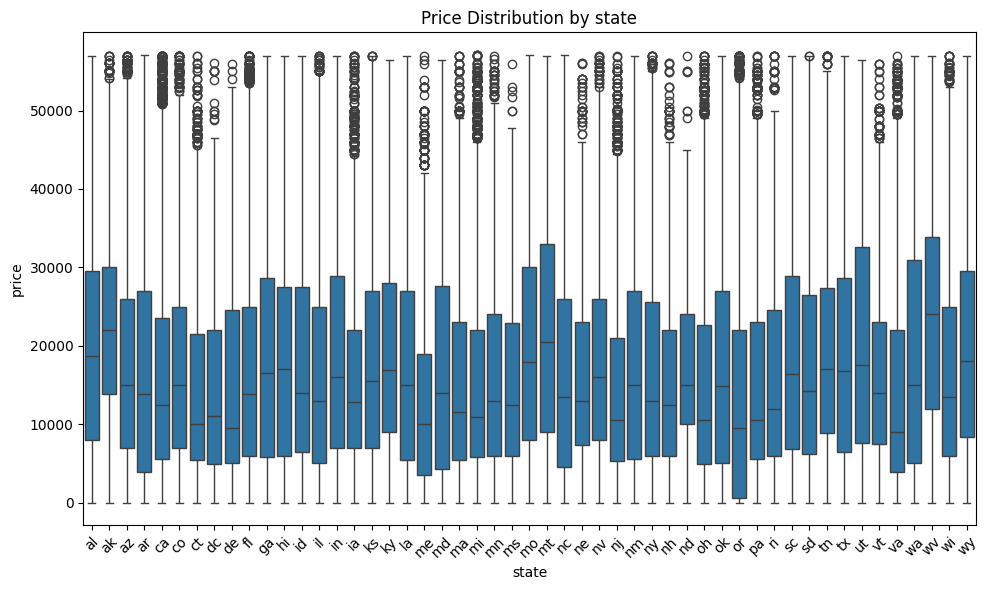

In [14]:
#lets try the categorical values
#print(df.info())

categorical_cols = ['region', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state']

for col in categorical_cols:
    print(f"\nMean and Median Price by {col}:")
    group_stats = df.groupby(col)['price'].agg(['mean', 'median', 'count']).round(2).sort_values('mean', ascending=False)

    print(group_stats.head(10))
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:

print(df.columns)

#fill categorical nans as unknowns
print("Condition unique values:"+str(df['condition'].unique())+", count of missing rows:"+str(len(df['condition'].isna())))
#replace nan with "unknown"
df['condition'] = df['condition'].fillna('unknown')

#Colors
print("Colors unique values: "+ str(df['paint_color'].unique()))
df['paint_color'] = df['paint_color'].fillna('unknown')

#fuel
print("fuel unique values: "+ str(df['fuel'].unique()))
df['fuel'] = df['fuel'].fillna('unknown')

#transmission, drop nans
print("transmission unique values: "+ str(df['transmission'].unique()))
df = df.dropna(subset=['transmission'])

#region
print("region unique values: "+ str(len(df['region'].unique())) + ", nan count:"+ str(df['region'].isna().sum()))
df['region'] = df['region'].fillna('unknown')


#title_status nan is a tiny percentage and a car value depends on title_status for a sale. We can safely drop those rows
print("title_status unique values: "+ str(len(df['title_status'].unique())) + ", nan count:"+ str(df['title_status'].isna().sum()))
df = df.dropna(subset=['title_status'])

#~4% manufacturer is nan and we cant impute that information. Drop those rows
print("manufacturer unique values: "+ str(len(df['manufacturer'].unique())) + ", nan count:"+ str(df['manufacturer'].isna().sum()))
df = df.dropna(subset=['manufacturer'])


Index(['region', 'price', 'manufacturer', 'condition', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'cylinders', 'age', 'age_binned', 'age_binned_label', 'odometer_binned',
       'odometer_binned_label'],
      dtype='object')
Condition unique values:['good' 'excellent' 'fair' nan 'like new' 'new' 'salvage'], count of missing rows:413088
Colors unique values: ['white' 'blue' 'red' 'black' 'silver' 'grey' nan 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
fuel unique values: ['gas' 'other' 'diesel' 'hybrid' nan 'electric']


/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_65497/2567128637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = df['condition'].fillna('unknown')
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_65497/2567128637.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['paint_color'] = df['paint_color'].fillna('unknown')
/var/folders/7x/9_8m0zjj67931vlpsl_xw1nr0000gn/T/ipykernel_65497/2567128637.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy o

transmission unique values: ['other' 'automatic' 'manual' nan]
region unique values: 404, nan count:0
title_status unique values: 7, nan count:7114
manufacturer unique values: 43, nan count:15334


<class 'pandas.core.frame.DataFrame'>
Index: 389011 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 389011 non-null  object 
 1   price                  389011 non-null  int64  
 2   manufacturer           389011 non-null  object 
 3   condition              389011 non-null  object 
 4   fuel                   389011 non-null  object 
 5   odometer               389011 non-null  float64
 6   title_status           389011 non-null  object 
 7   transmission           389011 non-null  object 
 8   drive                  272962 non-null  object 
 9   type                   305521 non-null  object 
 10  paint_color            389011 non-null  object 
 11  state                  389011 non-null  object 
 12  cylinders              389011 non-null  float64
 13  age                    389011 non-null  float64
 14  age_binned             389011 non-null  

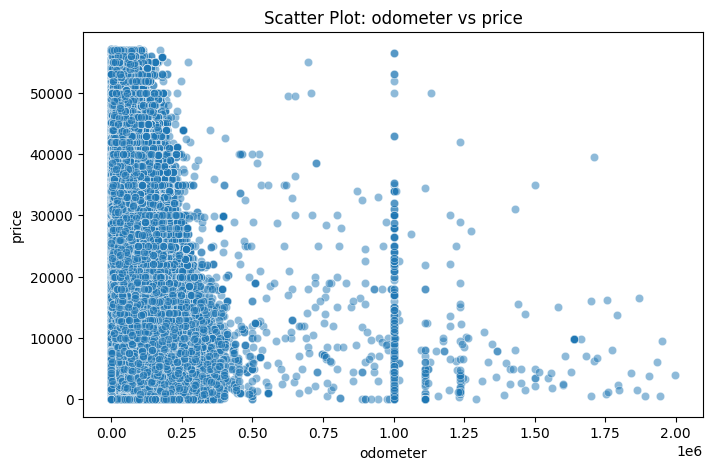

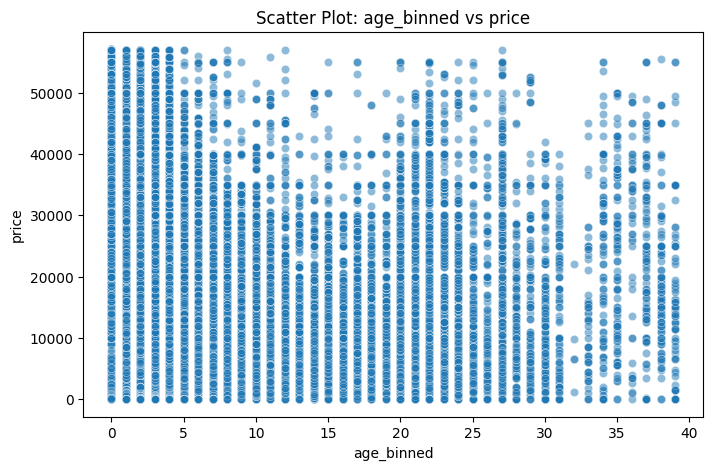

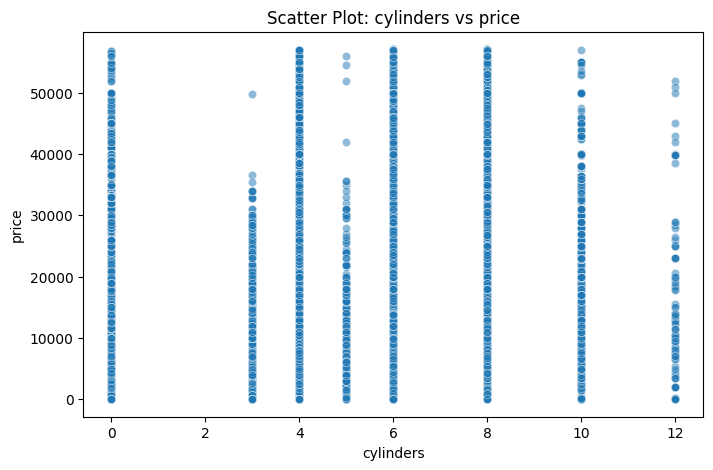

In [18]:
# lets do some uni and multivariate analysis and as part of it, lets see how outliers affect price
df.info()
import seaborn as sns
import matplotlib.pyplot as plt


target_col = 'price'
numerical_cols = ['odometer', 'age_binned', 'cylinders'] 
categorical_cols = ['region', 'manufacturer', 'condition', 'fuel',  'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state'] 
# Ensure all columns (except price) are in either numerical_cols or categorical_cols
feature_cols = numerical_cols + categorical_cols

print("--- Numerical Feature Correlations with Price ---")
# Ensure 'price' is also numeric
numeric_data_for_corr = df[numerical_cols + [target_col]]
correlation_matrix = numeric_data_for_corr.corr()
print(correlation_matrix[target_col].sort_values(ascending=False))

# Visualize with scatter plots
print("\n--- Scatter Plots (Numerical vs. Price) ---")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y=target_col, alpha=0.5) # Use alpha for large datasets
    plt.title(f'Scatter Plot: {col} vs {target_col}')
    plt.show()

#remove outliers with IQR for numerical columns: year, price, odometer (cylinders - what would be outliers here?)





# there are multiple columns that are non-numeric and could be relevant, # region, manufacturer, model, condition, lets ohe them

#check corr


Mean and Median Price by region:
                       mean   median  count
region                                     
boone              29951.32  32445.5    300
southwest TX       29668.57  29995.0     28
owensboro          29429.66  29990.0    133
galveston          29077.33  30990.0    210
olympic peninsula  28973.68  29999.0    631
northwest KS       28811.23  28990.0    136
san angelo         28746.52  28819.0    152
logan              28590.08  31999.0    132
east oregon        27939.90  27999.0    578
northwest OK       27745.00  27990.0    138


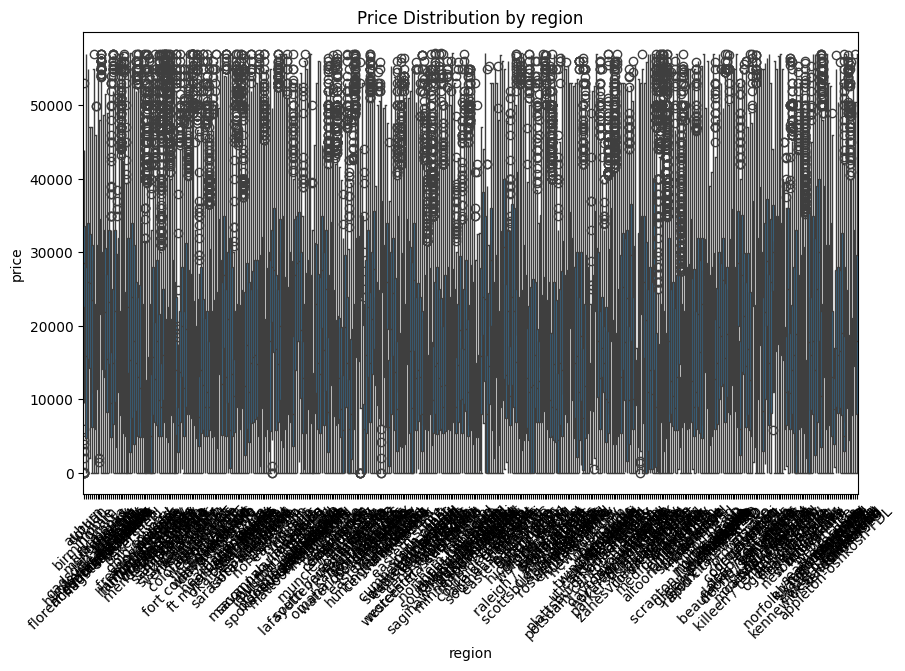


Mean and Median Price by manufacturer:
                  mean   median  count
manufacturer                          
tesla         35264.59  37590.0    750
alfa-romeo    28125.80  29590.0    890
jaguar        26307.75  28590.0   1907
ram           25049.36  26000.0  16911
porsche       24791.38  25000.0   1200
rover         23773.05  23900.0   1933
audi          22251.90  22950.0   7149
aston-martin  21870.21  17423.5     14
gmc           20785.93  19800.0  15411
acura         19887.13  18990.0   5828


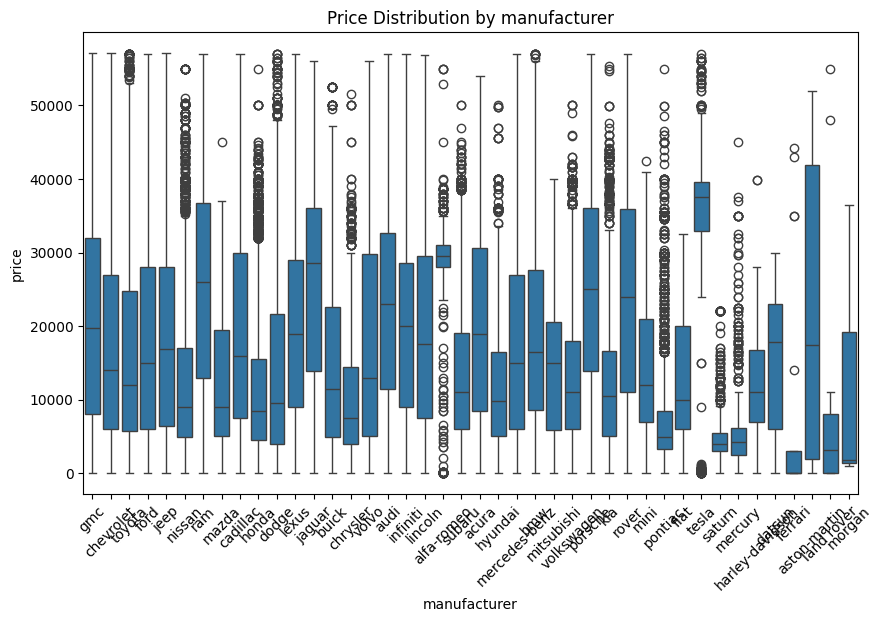


Mean and Median Price by condition:
               mean   median   count
condition                           
good       20494.33  20590.0  115222
new        17153.14  13940.0    1044
like new   16440.62  13495.0   19606
unknown    15824.48  12900.0  156905
excellent  13613.32  10950.0   89565
fair        3771.38   2797.0    6126
salvage     3726.06   1900.0     543


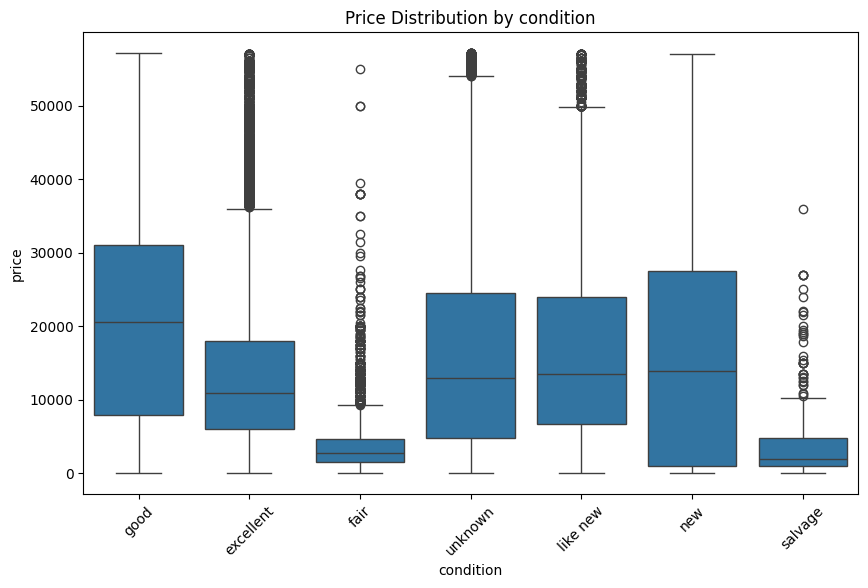


Mean and Median Price by fuel:
              mean   median   count
fuel                               
diesel    24468.71  24900.0   22540
other     24367.59  25590.0   28260
electric  23481.17  22777.0    1503
unknown   19434.23  17580.0    1529
gas       15300.48  11999.0  330225
hybrid    14376.78  11995.0    4954


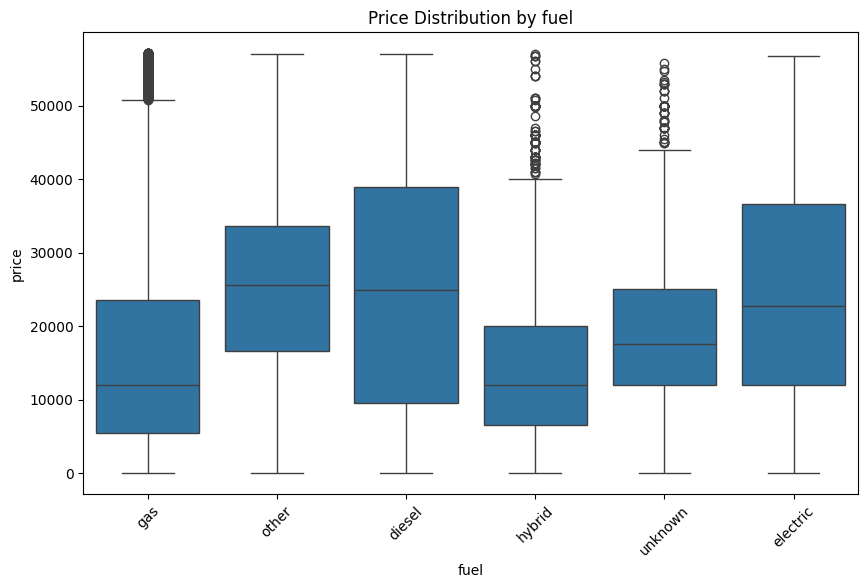


Mean and Median Price by title_status:
                  mean   median   count
title_status                           
lien          19888.38  17000.0    1287
clean         16685.90  13990.0  376351
rebuilt       12397.22   9999.0    6921
salvage        9300.56   7000.0    3680
missing        5089.21   2500.0     625
parts only     2878.65   1150.0     147


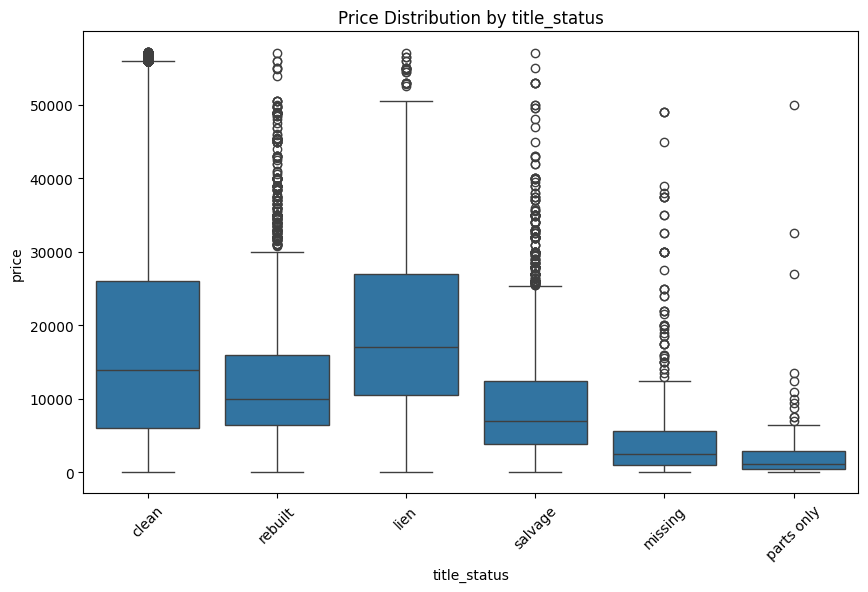


Mean and Median Price by transmission:
                  mean   median   count
transmission                           
other         27827.79  28590.0   59366
automatic     14614.06  10995.0  308235
manual        12722.83   8995.0   21410


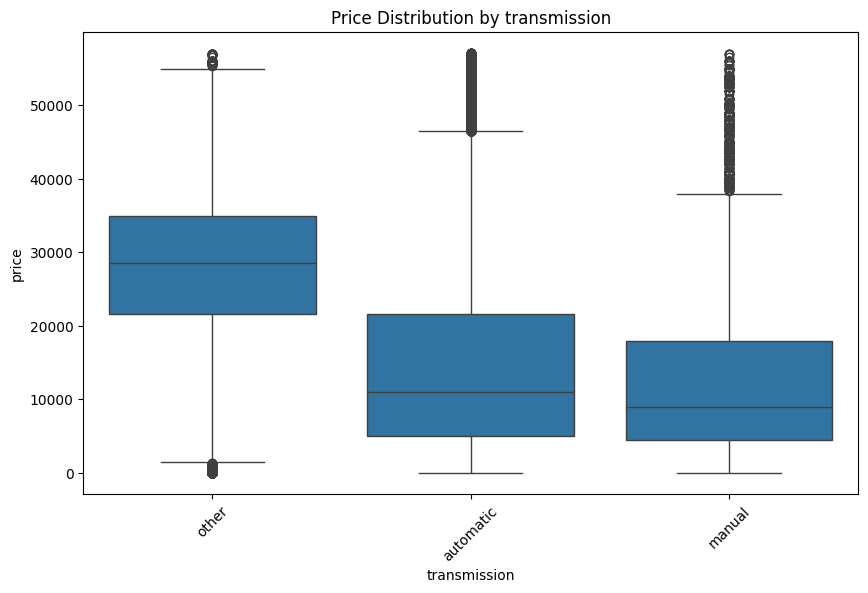


Mean and Median Price by drive:
           mean   median   count
drive                           
4wd    19741.19  17795.0  120645
rwd    18494.21  16990.0   52448
fwd    11568.08   9500.0   99869


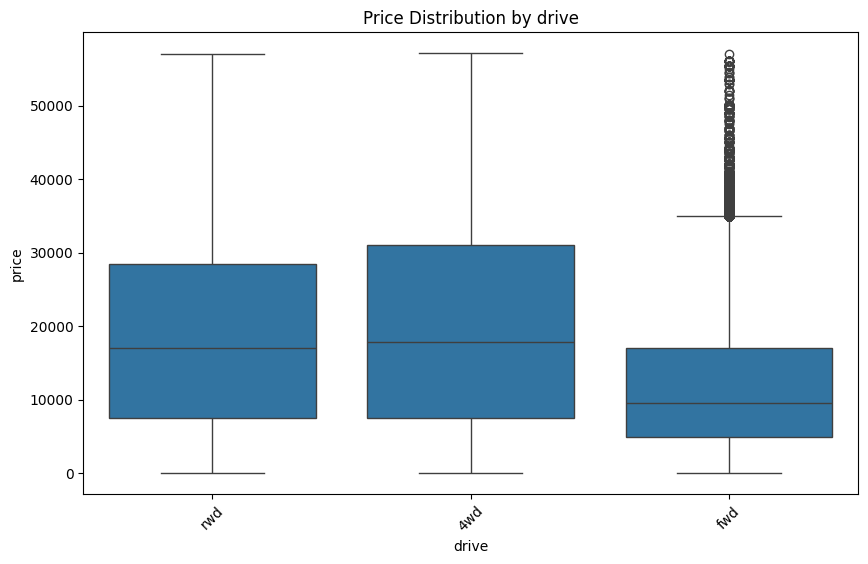


Mean and Median Price by type:
                 mean   median  count
type                                 
pickup       25656.29  26999.0  40397
other        24373.59  26590.0  19608
truck        20804.21  19600.0  30601
coupe        20130.33  18702.5  16832
convertible  17401.41  14995.0   6666
van          16156.54  14900.0   7628
SUV          15621.06  13000.0  71770
offroad      15345.52  12500.0    562
hatchback    14695.10  13990.0  15028
bus          13825.91  12900.0    317


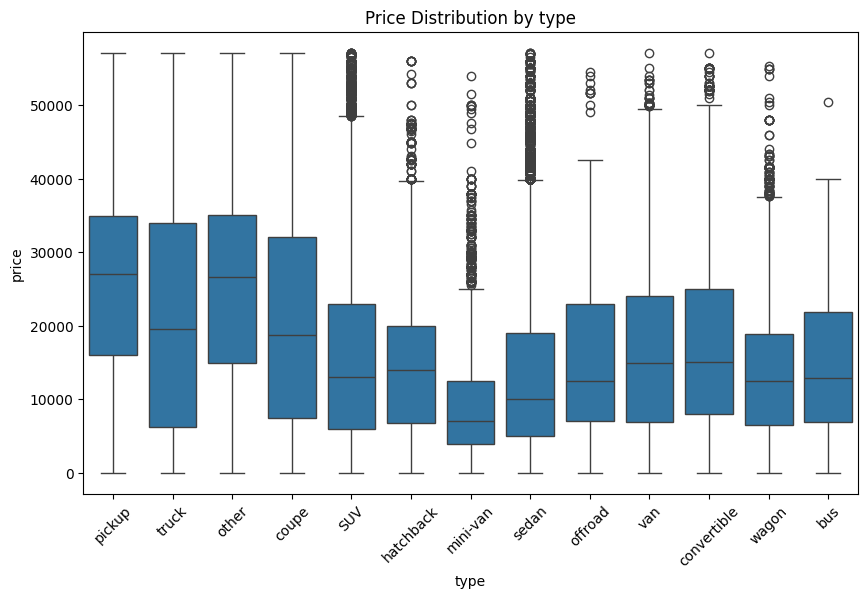


Mean and Median Price by paint_color:
                 mean   median   count
paint_color                           
white        19323.07  17990.0   72433
black        19179.64  16995.0   58700
red          17419.49  14999.0   27959
orange       17353.83  16990.0    1771
yellow       17077.04  14995.0    1724
blue         15599.98  12500.0   29282
silver       15283.43  11999.0   40860
unknown      14865.95  10950.0  113423
brown        14799.86  10995.0    6294
custom       14726.11  11900.0    6279


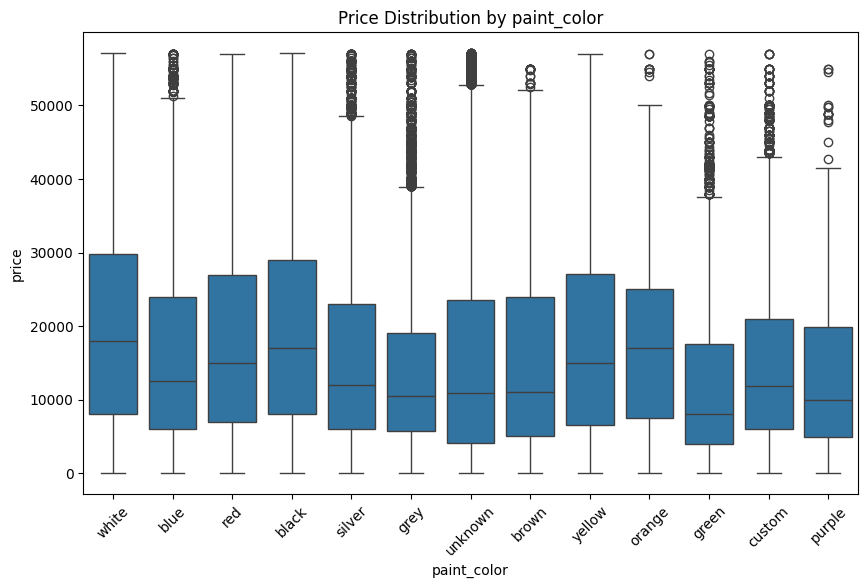


Mean and Median Price by state:
           mean   median  count
state                          
wv     23289.99  24990.0    974
ak     22707.88  21995.0   3276
mt     21846.24  20998.0   5638
ut     20328.02  16974.5    984
mo     20089.42  17990.0   4062
wy     19794.13  17995.0    557
al     19747.10  19000.0   4434
wa     19450.16  15888.0  11211
ky     18948.19  16950.0   3943
tn     18853.73  17590.0  10246


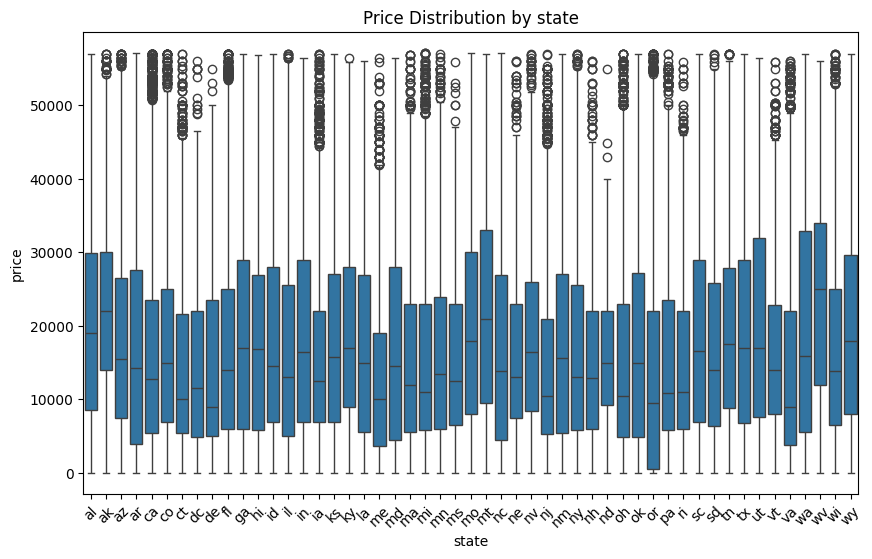

In [19]:
#lets try the categorical values
type(df)
for col in categorical_cols:
    print(f"\nMean and Median Price by {col}:")
    group_stats = df.groupby(col)['price'].agg(['mean', 'median', 'count']).round(2).sort_values('mean', ascending=False)

    print(group_stats.head(10))
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [20]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389011 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 389011 non-null  object 
 1   price                  389011 non-null  int64  
 2   manufacturer           389011 non-null  object 
 3   condition              389011 non-null  object 
 4   fuel                   389011 non-null  object 
 5   odometer               389011 non-null  float64
 6   title_status           389011 non-null  object 
 7   transmission           389011 non-null  object 
 8   drive                  272962 non-null  object 
 9   type                   305521 non-null  object 
 10  paint_color            389011 non-null  object 
 11  state                  389011 non-null  object 
 12  cylinders              389011 non-null  float64
 13  age                    389011 non-null  float64
 14  age_binned             389011 non-null  

In [21]:
correlation_matrix = df.corr()
print("\nCorrelation matrix :\n", correlation_matrix)

ValueError: could not convert string to float: 'gmc'

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.